# Project Psyched: A Closer Look Into Reproducibility In Psychological Research

## Data Analysis & Visualization Script: Part 2 - Test Statistics & Recalcuating P-Values
This script for data analysis and visualization after data has been scraped from TDM Studio.

Author: Yuyang Zhong (2020). This work is licensed under a [Creative Commons BY-NC-SA 4.0 International
License][cc-by].

![CC BY-NC-SA 4.0][cc-by-shield]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-shield]: https://img.shields.io/badge/license-CC--BY--NC--SA%204.0-blue

#### Setup & Imports

In [1]:
import json
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

from scipy import stats

In [2]:
in_path = "../data/"
in_name = 'JPSP_part2_092020.csv'

In [3]:
df = pd.read_csv(in_path + in_name, index_col=0)

#### Helper functions

In [20]:
def extract_f(s):
    """
    Takes in a string of reported F statistics with p-value and extract the numeric parameters.
    
    Returns: df1, df2, x, p
    """
    extract = re.findall(
        r'Fs?\s*\(\s*(\d+)\s*\,\s*(\d+)\s*\)\s*[\<|\>|\=]\s*(\d*\.?\d*)\s*\,\s*p\s*[\<|\>|\=]\s*(\d*\.\d+)',
        s)[0]    
    
    df1 = float(extract[0])
    df2 = float(extract[1])
    x = float(extract[2])
    p = float(extract[3])
    
    return df1, df2, x, p

In [21]:
def extract_f_ns(s):
    """
    Takes in a string of reported F statistics, non-significant, and extract the numeric parameters.
    
    Returns: df1, df2, x
    """
    extract = re.findall(
        r'Fs?\s*\(\s*(\d+)\s*\,\s*(\d+)\s*\)\s*[\<|\>|\=]\s*(\d*\.?\d*)\s*\,\s*n\.?s\.?',
        s)[0] 

    df1 = float(extract[0])
    df2 = float(extract[1])
    x = float(extract[2])
    
    return df1, df2, x

In [30]:
def extract_t(s):
    """
    Takes in a string of reported t score with p-value and extract the numeric parameters.
    
    Returns: df, x, p
    """
    
    s = re.sub(r'−\s*', "-", s)
    extract = re.findall(
        r't\s*\((\s*\d*\s*,)?\s*(\d+)\s*\)\s*[\<|\>|\=]\s*([\−|\-]?\s*\d*\.?\d*)\s*,\s*p\s*[\<|\>|\=]\s*(\d?\.\d+)',
        s)[0]
    
    df = float(extract[1])
    x = float(extract[2].replace(" ", ""))
    p = float(extract[3])
    
    return df, x, p

In [31]:
def extract_t_ns(s):
    """
    Takes in a string of reported t score, non-significant, and extract the numeric parameters.
    
    Returns: df, x
    """
    
    s = re.sub(r'−\s*', "-", s)
    extract = re.findall(
        r't\s*\((\s*\d*\s*,)?\s*(\d+)\s*\)\s*[\<|\>|\=]\s*([\−|\-]?\s*\d*\.?\d*)\s*,\s*p\s*[\<|\>|\=]\s*(\d?\.\d+)',
        s)[0]  
    
    df = float(extract[1])
    x = float(extract[2].replace(" ", ""))
    
    return df, x

#### Set up output dataframe

In [32]:
df_stats = pd.DataFrame(columns=['File', 'Original', 'Type', 'Reported p-value', 'Recalculated p-value'])
# df_stats_ns = pd.DataFrame(columns=['File', 'Original', 'Type', 'Reported p-value', 'Recalculated p-value'])

#### Script to iterate through all statistics

In [33]:
def extract_f_compute_add(test_type, index, s, df_stats=df_stats):
    ex = extract_f(s)
    return {'File': index, 
            'Original': s, 
            'Type': test_type, 
            'Reported p-value': ex[3], 
            'Recalculated p-value': stats.f.pdf(ex[2], ex[0], ex[1])}

In [34]:
def extract_t_compute_add(test_type, index, s, df_stats=df_stats):
    ex = extract_t(s)
    return {'File': index, 
            'Original': s, 
            'Type': test_type, 
            'Reported p-value': ex[2], 
            'Recalculated p-value': stats.t.pdf(ex[1], ex[0])}

In [ ]:
# for s in df.loc['614337945.xml'].apply(ast.literal_eval)['t_scores']:
#     df_stats = df_stats.append(extract_t_compute_add('t', '614337945.xml', s), ignore_index=True)

# for s in df.iloc[2].apply(ast.literal_eval)['F_stats']:
#     df_stats = df_stats.append(extract_f_compute_add('f', '0.xml', s), ignore_index=True)

In [35]:
for index, row in df.iterrows():
    r = row.apply(ast.literal_eval)
    
    if len(r['F_stats']) > 0:
        for s in r['F_stats']:
            df_stats = df_stats.append(extract_f_compute_add('f', index, s), ignore_index=True)
            
    if len(r['t_scores']) > 0:
        for s in r['t_scores']:
            df_stats = df_stats.append(extract_t_compute_add('t', index, s), ignore_index=True)

/usr/local/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5930: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


In [36]:
df_stats

,File,Original,Type,Reported p-value,Recalculated p-value
0,614337945.xml,"t (41) = 4.10, p < .01",t,0.01,2.915149e-04
1,614337945.xml,"t (41) = −3.56, p < .01",t,0.01,1.385951e-03
2,614337945.xml,"t (41) = 8.21, p < .01",t,0.01,5.379765e-10
3,614337945.xml,"t (41) = 4.82, p < .01",t,0.01,3.190701e-05
4,614337945.xml,"t (41) = −2.57, p < .01",t,0.01,1.722021e-02
...,...,...,...,...,...
98883,614461090.xml,"t(72) = 1.89, p < .07",t,0.07,6.789595e-02
98884,614461090.xml,"t(72) = 1.63, p < .11",t,0.11,1.059217e-01
98885,614461090.xml,"t(81) = 1.79, p < .08",t,0.08,8.105740e-02
98886,614461090.xml,"t(81) = 1.72, p < .08",t,0.08,9.137453e-02


In [37]:
df_stats[df_stats['Recalculated p-value'] > 1].head()

,File,Original,Type,Reported p-value,Recalculated p-value
64,953188771.xml,"F(1, 78) = 0.06, p > .80",f,0.80,1.574895
67,953188771.xml,"F(1, 78) = 0.03, p > .80",f,0.80,2.261314
547,614400318.xml,"F(1, 66) = 0.02, p =.89",f,0.89,2.781903
548,614400318.xml,"F(1, 28) = 0.09, p =.77",f,0.77,1.258065
549,614400318.xml,"F(1, 27) = 0.03, p =.87",f,0.87,2.246866


In [38]:
df_stats[df_stats['Reported p-value'] > 1].head()

,File,Original,Type,Reported p-value,Recalculated p-value
30638,745195391.xml,"t(200) = 12.14, p < 2.2",t,2.200,3.184553e-25
30639,745195391.xml,"t(201) = 12.12, p < 2.2",t,2.200,3.443344e-25
30640,745195391.xml,"t(202) = 6.73, p = 1.695",t,1.695,4.814535e-10
30641,745195391.xml,"t(199) = 12.56, p < 2.2",t,2.200,1.773518e-26
30642,745195391.xml,"t(200) = 4.92, p = 1.77",t,1.770,4.109199e-06


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


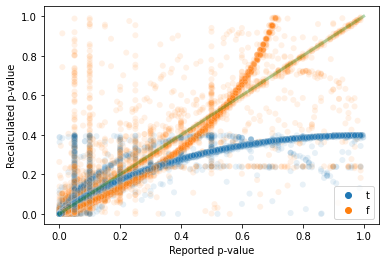

In [51]:
sns.scatterplot(x='Reported p-value', y='Recalculated p-value', 
                data=df_stats[(df_stats['Reported p-value'] < 1) & (df_stats['Recalculated p-value'] < 1)], 
                alpha=0.1, hue='Type')
sns.lineplot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='green', linewidth=3, alpha=0.3);